In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import plotly.express as px 
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot') #default style for all visualisations
pd.set_option('display.max_columns', 100) #expand no. of columns shown
pd.set_option('display.max_rows', 100)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [2]:
# loading the dataset into a dataframe
url = "https://jse.amstat.org/v19n3/decock/AmesHousing.txt"
df = pd.read_csv(url, delimiter='\t')

## **Data Understanding**

In [3]:
df.shape

(2930, 82)

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [6]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [7]:
df.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

## **Data Preparation**

In [8]:
df=df[[   
       #'Order', 'PID', 'MS SubClass', 
       'MS Zoning', 'Lot Frontage', 'Lot Area',
       #'Street', 'Alley', 'Lot Shape', 
       'Land Contour', 
       #'Utilities','Lot Config', 'Land Slope', 
       'Neighborhood', 
       #'Condition 1', 'Condition 2', 
       'Bldg Type', 
       #'House Style', 
       'Overall Qual', 'Overall Cond', 'Year Built', 
       #'Year Remod/Add', 'Roof Style',
       #'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       #'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       #'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       #'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
       'Total Bsmt SF',
       #'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       #'2nd Flr SF', 'Low Qual Fin SF', 
       'Gr Liv Area', 
       #'Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Kitchen AbvGr',
       'Bedroom AbvGr', 'Full Bath',
       'Kitchen Qual', 'TotRms AbvGrd', 
       #'Functional','Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       #'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       #'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       #'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       #'Fence', 'Misc Feature', 'Misc Val', 
       'Mo Sold', 'Yr Sold', 
       'Sale Type', 'Sale Condition', 'SalePrice']].copy()

In [9]:
df.shape

(2930, 20)

In [10]:
df.head()

,MS Zoning,Lot Frontage,Lot Area,Land Contour,Neighborhood,Bldg Type,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Full Bath,Kitchen Qual,TotRms AbvGrd,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,RL,141.0,31770,Lvl,NAmes,1Fam,6,5,1960,1080.0,1656,3,1,TA,7,5,2010,WD,Normal,215000
1,RH,80.0,11622,Lvl,NAmes,1Fam,5,6,1961,882.0,896,2,1,TA,5,6,2010,WD,Normal,105000
2,RL,81.0,14267,Lvl,NAmes,1Fam,6,6,1958,1329.0,1329,3,1,Gd,6,6,2010,WD,Normal,172000
3,RL,93.0,11160,Lvl,NAmes,1Fam,7,5,1968,2110.0,2110,3,2,Ex,8,4,2010,WD,Normal,244000
4,RL,74.0,13830,Lvl,Gilbert,1Fam,5,5,1997,928.0,1629,3,2,TA,6,3,2010,WD,Normal,189900


In [11]:
df = df.rename(columns={'MS Zoning':'MS_Zoning', 'Lot Frontage':'LotFrontage_ft', 'Lot Area':'LotArea_sqft', 
           'Land Contour':'Land_Contour', 
           #'Neighborhood',
           'Bldg Type':'Building_Type', 'Overall Qual':'Overall_Quality', 'Overall Cond':'Overall_Condition', 
           'Year Built':'Year_Built','Total Bsmt SF':'TotalBsmt_sqft', 'Gr Liv Area':'GroundLivArea_sqft', 
           'Bedroom AbvGr':'Bedroom_AbvGr', 'Full Bath':'Full_Bath',
           'Kitchen Qual':'Kitchen_Quality', 'TotRms AbvGrd':'TotRms_AbvGrd', 'Mo Sold':'Month_Sold', 'Yr Sold':'Year_Sold', 
           'Sale Type':'Sale_Type', 'Sale Condition':'Sale_Condition', 'SalePrice':'SalePrice_USD'})

In [12]:
df.dtypes

MS_Zoning              object
LotFrontage_ft        float64
LotArea_sqft            int64
Land_Contour           object
Neighborhood           object
Building_Type          object
Overall_Quality         int64
Overall_Condition       int64
Year_Built              int64
TotalBsmt_sqft        float64
GroundLivArea_sqft      int64
Bedroom_AbvGr           int64
Full_Bath               int64
Kitchen_Quality        object
TotRms_AbvGrd           int64
Month_Sold              int64
Year_Sold               int64
Sale_Type              object
Sale_Condition         object
SalePrice_USD           int64
dtype: object

**Changing the datatypes of the columns below because they are categorical variables and I intend
to change their values to from numeric to string which is not possible if there data types are still numeric**

In [13]:
df[['Overall_Quality', 'Overall_Condition', 'Month_Sold']] =\
df[['Overall_Quality', 'Overall_Condition', 'Month_Sold']].astype(object)

In [14]:
df.dtypes

MS_Zoning              object
LotFrontage_ft        float64
LotArea_sqft            int64
Land_Contour           object
Neighborhood           object
Building_Type          object
Overall_Quality        object
Overall_Condition      object
Year_Built              int64
TotalBsmt_sqft        float64
GroundLivArea_sqft      int64
Bedroom_AbvGr           int64
Full_Bath               int64
Kitchen_Quality        object
TotRms_AbvGrd           int64
Month_Sold             object
Year_Sold               int64
Sale_Type              object
Sale_Condition         object
SalePrice_USD           int64
dtype: object

### **Transforming categorical feature values**

**Replacing the values of MS_Zoning column to more descriptive values**

In [15]:
df['MS_Zoning'].unique()

array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
      dtype=object)

In [16]:
df['MS_Zoning'] = df['MS_Zoning'].replace({
    'RL': '(Res) Low Density', #(Res) stands for residential
    'RH': '(Res) High Density',
    'FV': '(Res) Floating Village', 
    'RM': '(Res) Medium Density', 
    'C (all)': 'Commercial', 
    'I (all)': 'Industrial', 
    'A (agr)': 'Agriculture'})

In [17]:
df['MS_Zoning'].unique()

array(['(Res) Low Density', '(Res) High Density',
       '(Res) Floating Village', '(Res) Medium Density', 'Commercial',
       'Industrial', 'Agriculture'], dtype=object)

**Replacing the values of Overall_Quality column to more descriptive values**

In [18]:
df['Overall_Quality'].unique()

array([6, 5, 7, 8, 9, 4, 3, 2, 10, 1], dtype=object)

In [19]:
df['Overall_Quality'] = df['Overall_Quality'].replace({
       10: 'Very Excellent',
       9: 'Excellent',
       8: 'Very Good',
       7: 'Good',
       6: 'Above Average',
       5: 'Average',
       4: 'Below Average',
       3: 'Fair',
       2: 'Poor',
       1: 'Very Poor'})

In [20]:
df['Overall_Quality'].unique()

array(['Above Average', 'Average', 'Good', 'Very Good', 'Excellent',
       'Below Average', 'Fair', 'Poor', 'Very Excellent', 'Very Poor'],
      dtype=object)

**Replacing the values of Overall_Condition column to more descriptive values**

In [21]:
df['Overall_Condition'].unique()

array([5, 6, 7, 2, 8, 4, 9, 3, 1], dtype=object)

In [22]:
df['Overall_Condition'] = df['Overall_Condition'].replace({
       10: 'Very Excellent',
       9: 'Excellent',
       8: 'Very Good',
       7: 'Good',
       6: 'Above Average',
       5: 'Average',
       4: 'Below Average',
       3: 'Fair',
       2: 'Poor',
       1: 'Very Poor'})

In [23]:
df['Overall_Condition'].unique()

array(['Average', 'Above Average', 'Good', 'Poor', 'Very Good',
       'Below Average', 'Excellent', 'Fair', 'Very Poor'], dtype=object)

**Replacing Building_Type values** 
in reference to the [Ames Housing Data Documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [24]:
df['Building_Type'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object)

In [25]:
df['Building_Type'] = df['Building_Type'].replace({
     '1Fam': 'Single-family Detached',
     '2fmCon': 'Two-family Conversion',
     'Duplx': 'Duplex',
     'TwnhsE': 'TwnHs End Unit',
     'Twnhs': 'TwnHs Inside Unit'})

In [26]:
df['Building_Type'].unique()

array(['Single-family Detached', 'TwnHs End Unit', 'TwnHs Inside Unit',
       'Duplex', 'Two-family Conversion'], dtype=object)

**Replacing Sale_Type values** 
in reference to the [Ames Housing Data Documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [27]:
df['Sale_Type'].unique()

array(['WD ', 'New', 'COD', 'ConLI', 'Con', 'ConLD', 'Oth', 'ConLw',
       'CWD', 'VWD'], dtype=object)

In [28]:
df['Sale_Type'] = df['Sale_Type'].replace({ 
    'WD ': 'Conventional WD', # WD stands for warranty deed
    'CWD': 'Cash WD',
    'VWD': 'VA Loan WD',
    'New': 'New on mkt',
    'COD': 'Court Officer Deed',
    'Con': 'Contract regular',
    'ConLw': '(Con) LowDown payt&I', #Con stands for contract
    'ConLI': '(Con) Low I', #I stands for Interest
    'ConLD': 'Contract LowDown',
    'Oth': 'Other'})

In [29]:
df['Sale_Type'].unique()

array(['Conventional WD', 'New on mkt', 'Court Officer Deed',
       '(Con) Low I', 'Contract regular', 'Contract LowDown', 'Other',
       '(Con) LowDown payt&I', 'Cash WD', 'VA Loan WD'], dtype=object)

**Replacing Kitchen_Quality column values** 
in reference to the [Ames Housing Data Documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [30]:
df['Kitchen_Quality'].unique()


array(['TA', 'Gd', 'Ex', 'Fa', 'Po'], dtype=object)

In [31]:
df['Kitchen_Quality'] = df['Kitchen_Quality'].replace({
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Typical',
    'Fa': 'Fair',
    'Po': 'Poor'})

In [32]:
df['Kitchen_Quality'].unique()

array(['Typical', 'Good', 'Excellent', 'Fair', 'Poor'], dtype=object)

**Replacing Land_Contour column values** 
in reference to the [Ames Housing Data Documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [33]:
df['Land_Contour'].unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [34]:
df['Land_Contour'] = df['Land_Contour'].replace({
    'Lvl': 'Near Flat/Level',
    'Bnk': 'Banked', #- Quick and significant rise from street grade to building
    'HLS': 'Hillside', #- Significant slope from side to side
    'Low': 'Depression'})

In [35]:
df['Land_Contour'].unique()

array(['Near Flat/Level', 'Hillside', 'Banked', 'Depression'],
      dtype=object)

**Replacing Neighbourhood column values** 
in reference to the [Ames Housing Data Documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [36]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [37]:
df['Neighborhood'] = df['Neighborhood'].replace({
       'Blmngtn': 'Bloomington Heights',
       'Blueste': 'Bluestem',
       'BrDale': 'Briardale',
       'BrkSide': 'Brookside',
       'ClearCr': 'Clear Creek',
       'CollgCr': 'College Creek',
       'Crawfor': 'Crawford',
       'Edwards': 'Edwards',
       'Gilbert': 'Gilbert',
       'Greens': 'Greens',
       'GrnHill': 'Green Hills',
       'IDOTRR': 'Iowa DOT and Rail Road',
       'Landmrk': 'Landmark',
       'MeadowV': 'Meadow Village',
       'Mitchel': 'Mitchell',
       'NAmes': 'North Ames',
       'NoRidge': 'Northridge',
       'NPkVill': 'Northpark Villa',
       'NridgHt': 'Northridge Heights',
       'NWAmes': 'Northwest Ames',
       'OldTown': 'Old Town',
       'SWISU': 'South & West of Iowa State University',
       'Sawyer': 'Sawyer',
       'SawyerW': 'Sawyer West',
       'Somerst': 'Somerset',
       'StoneBr': 'Stone Brook',
       'Timber': 'Timberland',
       'Veenker': 'Veenker'})

In [38]:
df['Neighborhood'].unique()

array(['North Ames', 'Gilbert', 'Stone Brook', 'Northwest Ames',
       'Somerset', 'Briardale', 'Northpark Villa', 'Northridge Heights',
       'Bloomington Heights', 'Northridge', 'Sawyer West', 'Sawyer',
       'Greens', 'Brookside', 'Old Town', 'Iowa DOT and Rail Road',
       'Clear Creek', 'South & West of Iowa State University', 'Edwards',
       'College Creek', 'Crawford', 'Bluestem', 'Mitchell', 'Timberland',
       'Meadow Village', 'Veenker', 'Green Hills', 'Landmark'],
      dtype=object)

In [39]:
df['Month_Sold'].unique()

array([5, 6, 4, 3, 1, 2, 7, 10, 8, 11, 9, 12], dtype=object)

In [40]:
df['Month_Sold'] = df['Month_Sold'].replace({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'})    

In [41]:
df['Month_Sold'].unique()

array(['May', 'Jun', 'Apr', 'Mar', 'Jan', 'Feb', 'Jul', 'Oct', 'Aug',
       'Nov', 'Sep', 'Dec'], dtype=object)

**Overview of Transformed Categorical feature values**

In [42]:
df.head()

,MS_Zoning,LotFrontage_ft,LotArea_sqft,Land_Contour,Neighborhood,Building_Type,Overall_Quality,Overall_Condition,Year_Built,TotalBsmt_sqft,GroundLivArea_sqft,Bedroom_AbvGr,Full_Bath,Kitchen_Quality,TotRms_AbvGrd,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,SalePrice_USD
0,(Res) Low Density,141.0,31770,Near Flat/Level,North Ames,Single-family Detached,Above Average,Average,1960,1080.0,1656,3,1,Typical,7,May,2010,Conventional WD,Normal,215000
1,(Res) High Density,80.0,11622,Near Flat/Level,North Ames,Single-family Detached,Average,Above Average,1961,882.0,896,2,1,Typical,5,Jun,2010,Conventional WD,Normal,105000
2,(Res) Low Density,81.0,14267,Near Flat/Level,North Ames,Single-family Detached,Above Average,Above Average,1958,1329.0,1329,3,1,Good,6,Jun,2010,Conventional WD,Normal,172000
3,(Res) Low Density,93.0,11160,Near Flat/Level,North Ames,Single-family Detached,Good,Average,1968,2110.0,2110,3,2,Excellent,8,Apr,2010,Conventional WD,Normal,244000
4,(Res) Low Density,74.0,13830,Near Flat/Level,Gilbert,Single-family Detached,Average,Average,1997,928.0,1629,3,2,Typical,6,Mar,2010,Conventional WD,Normal,189900


### **Creating the Property age feature**

In [43]:
#finding how old the property was as of the sale date
df['Property_Age'] = df['Year_Sold'] - df['Year_Built']

In [44]:
df['Property_Age']

0       50
1       49
2       52
3       42
4       13
        ..
2925    22
2926    23
2927    14
2928    32
2929    13
Name: Property_Age, Length: 2930, dtype: int64

### **Checking for null values**

In [45]:
df.isna().sum()

MS_Zoning               0
LotFrontage_ft        490
LotArea_sqft            0
Land_Contour            0
Neighborhood            0
Building_Type           0
Overall_Quality         0
Overall_Condition       0
Year_Built              0
TotalBsmt_sqft          1
GroundLivArea_sqft      0
Bedroom_AbvGr           0
Full_Bath               0
Kitchen_Quality         0
TotRms_AbvGrd           0
Month_Sold              0
Year_Sold               0
Sale_Type               0
Sale_Condition          0
SalePrice_USD           0
Property_Age            0
dtype: int64

**OBSERVATION:**
- The lotFrontage_ft and TotalBsmt_sqft are the only columns with null values.
- lotFrontage_ft column has 490 missing values and GroundLivArea_sqft column has 1 missing value

### **Checking for duplicates**

In [46]:
#count of duplicates
df.duplicated().sum()

2

In [47]:
#making the inverse of the duplicates the new working dataframe
df = df[~df.duplicated()].reset_index(drop=True).copy()

In [48]:
df.shape

(2928, 21)

## **Exploratory Data Analysis(EDA)**

### **Summary Statistics**

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage_ft,2438.0,69.230517,23.373933,21.0,58.00,68.0,80.0,313.0
LotArea_sqft,2928.0,10148.768101,7882.487925,1300.0,7440.75,9436.5,11556.0,215245.0
Year_Built,2928.0,1971.348361,30.253979,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmt_sqft,2927.0,1051.923129,440.328019,0.0,793.00,990.0,1302.0,6110.0
GroundLivArea_sqft,2928.0,1499.780738,505.650793,334.0,1126.00,1442.0,1743.0,5642.0
Bedroom_AbvGr,2928.0,2.853825,0.827739,0.0,2.00,3.0,3.0,8.0
Full_Bath,2928.0,1.565915,0.552436,0.0,1.00,2.0,2.0,4.0
TotRms_AbvGrd,2928.0,6.442964,1.573012,2.0,5.00,6.0,7.0,15.0
Year_Sold,2928.0,2007.789617,1.316683,2006.0,2007.00,2008.0,2009.0,2010.0
SalePrice_USD,2928.0,180817.827186,79905.769953,12789.0,129500.00,160000.0,213500.0,755000.0


### **Feature Understanding**

Data represented by numbers

In [50]:
numerical_cols = df.select_dtypes("number")
numerical_cols.dtypes

LotFrontage_ft        float64
LotArea_sqft            int64
Year_Built              int64
TotalBsmt_sqft        float64
GroundLivArea_sqft      int64
Bedroom_AbvGr           int64
Full_Bath               int64
TotRms_AbvGrd           int64
Year_Sold               int64
SalePrice_USD           int64
Property_Age            int64
dtype: object

**OBSERVATION**
- Data is mainly represented by integer number.

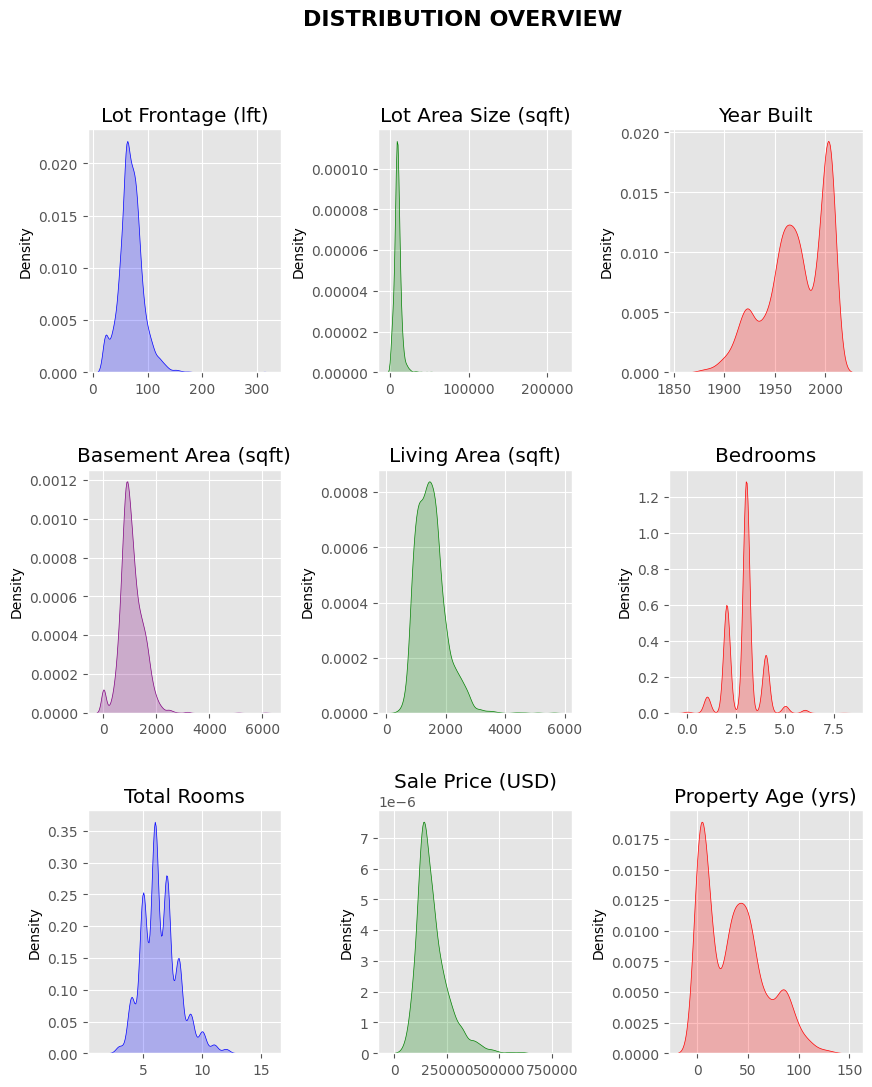

In [52]:
# Creating a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 12),
            gridspec_kw={'hspace': 0.4, 'wspace': 0.5})

# Plotting the Kernel Density Plots in each subplot
sns.kdeplot(df['LotFrontage_ft'], ax=axs[0, 0], fill=True, color='blue')
sns.kdeplot(df['LotArea_sqft'], ax=axs[0, 1], fill=True, color='green')
sns.kdeplot(df['Year_Built'], ax=axs[0, 2], fill=True, color='red')
sns.kdeplot(df['TotalBsmt_sqft'], ax=axs[1, 0], fill=True, color='purple')
sns.kdeplot(df['GroundLivArea_sqft'], ax=axs[1, 1], fill=True, color='green')
sns.kdeplot(df['Bedroom_AbvGr'], ax=axs[1, 2], fill=True, color='red')
sns.kdeplot(df['TotRms_AbvGrd'], ax=axs[2, 0], fill=True, color='blue')
sns.kdeplot(df['SalePrice_USD'], ax=axs[2, 1], fill=True, color='green')
sns.kdeplot(df['Property_Age'], ax=axs[2, 2], fill=True, color='red')

# Setting titles for each subplot
axs[0, 0].set_title('Lot Frontage (lft)')
axs[0, 1].set_title('Lot Area Size (sqft)')
axs[0, 2].set_title('Year Built')
axs[1, 0].set_title('Basement Area (sqft)')
axs[1, 1].set_title('Living Area (sqft)')
axs[1, 2].set_title('Bedrooms')
axs[2, 0].set_title('Total Rooms')
axs[2, 1].set_title('Sale Price (USD)')
axs[2, 2].set_title('Property Age (yrs)')

#Removing the x-axis label
axs[0, 0].set(xlabel='')
axs[0, 1].set(xlabel='')
axs[0, 2].set(xlabel='')
axs[1, 0].set(xlabel='')
axs[1, 1].set(xlabel='')
axs[1, 2].set(xlabel='')
axs[2, 0].set(xlabel='')
axs[2, 1].set(xlabel='')
axs[2, 2].set(xlabel='')

# Setting a title for the overall plot
fig.suptitle('DISTRIBUTION OVERVIEW', fontsize=16, fontweight='bold')

# Displaying the plot
plt.show()


There are some outlier values in 'LotArea_sqft' & also in the ot_frontage column

In [53]:
df['LotArea_sqft'].sort_values()

933       1300
2911      1470
329       1476
1597      1477
975       1477
         ...  
2764     70761
2069    115149
2113    159000
1568    164660
954     215245
Name: LotArea_sqft, Length: 2928, dtype: int64

**Count of Categorical features**

In [55]:
string_data = df.select_dtypes(object)
string_data.columns

Index(['MS_Zoning', 'Land_Contour', 'Neighborhood', 'Building_Type',
       'Overall_Quality', 'Overall_Condition', 'Kitchen_Quality', 'Month_Sold',
       'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [56]:
# Neighbourhoods are quite many, so it would make sense to visualize just a few of them e.g top 10
#Therefore, creating a dataframe with top neighbourhoods

In [57]:
#top 10 neighbourhoods
df['Neighborhood'].value_counts().head(10)

North Ames            443
College Creek         267
Old Town              239
Edwards               193
Somerset              182
Northridge Heights    166
Gilbert               165
Sawyer                151
Northwest Ames        131
Sawyer West           124
Name: Neighborhood, dtype: int64

In [58]:
#create dataframe with only top 10 neighbourhoods
top_10 = df.loc[df['Neighborhood'].isin(['College Creek', 'Old Town',
'Edwards', 'Somerset', 'Northridge Heights', 'Gilbert',
'Sawyer', 'Northwest Ames', 'Sawyer West'])]

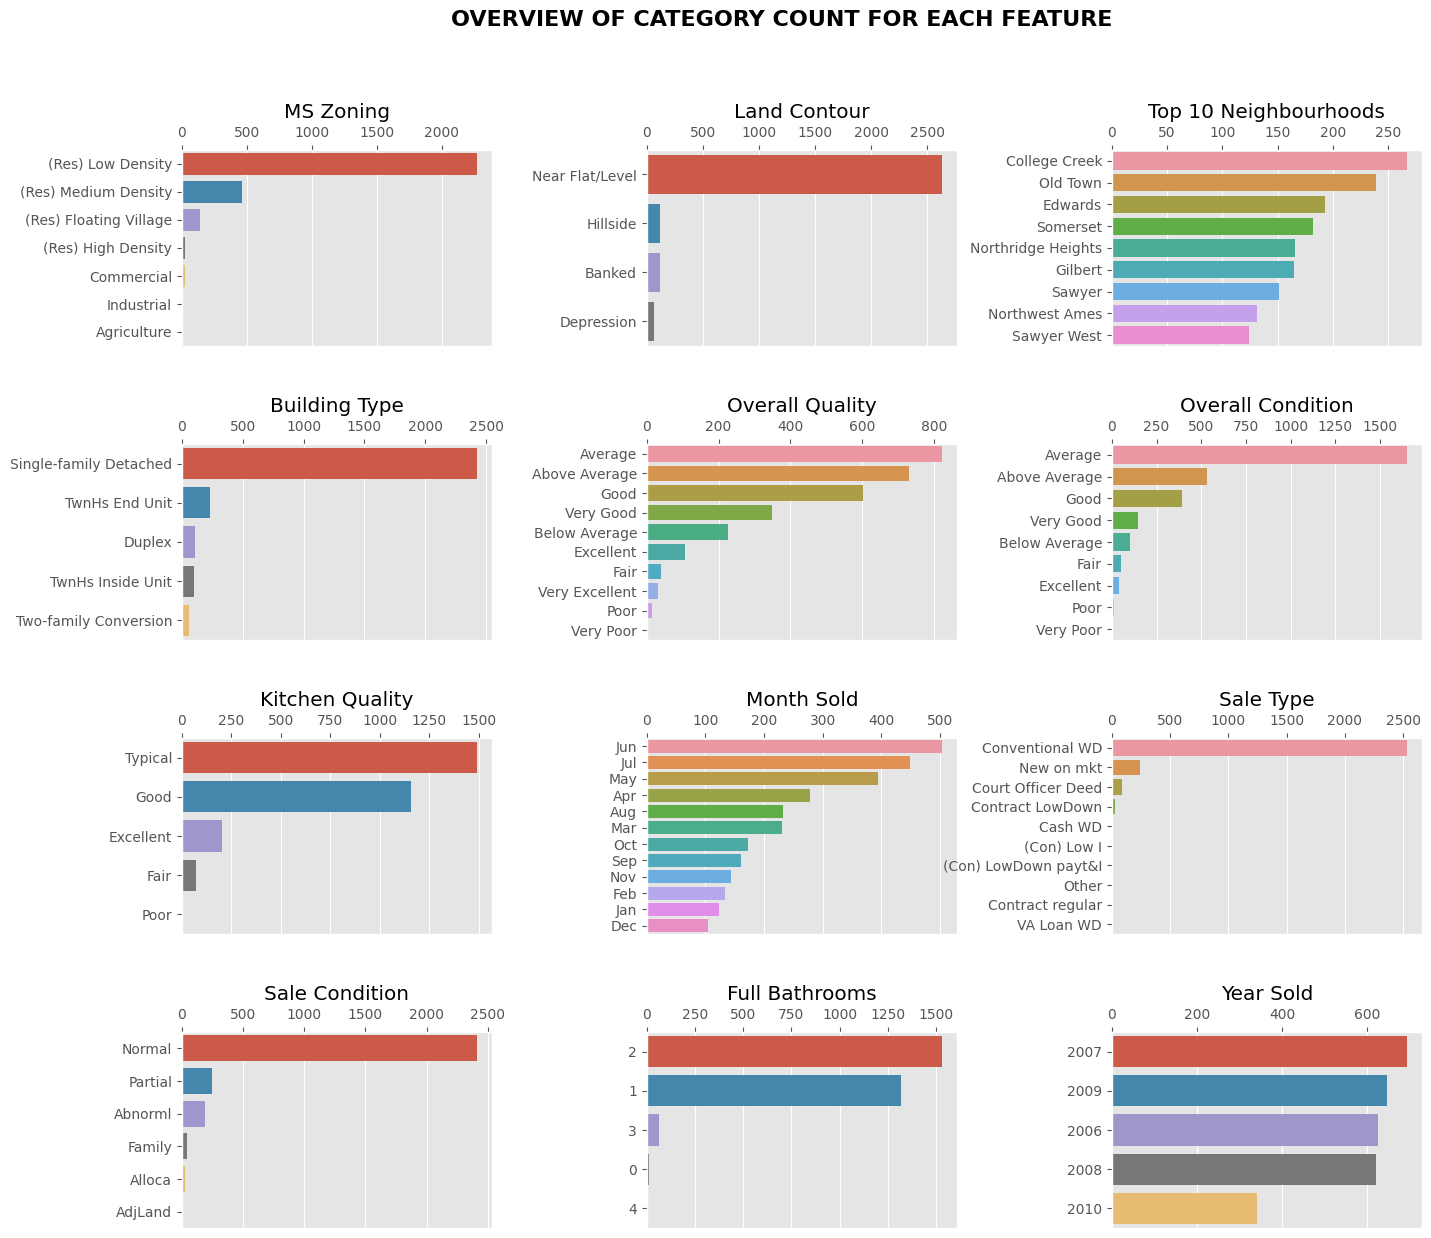

In [63]:
# Creating a grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 14),
            gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

# Plotting the horizontal Count Plots in each subplot
ax1 = sns.countplot(data=df,  y="MS_Zoning", ax=axs[0, 0],
                   order=df["MS_Zoning"].value_counts().index)
ax2 = sns.countplot(data=df,  y="Land_Contour", ax=axs[0, 1])
ax3 = sns.countplot(data=top_10,  y="Neighborhood", ax=axs[0, 2],
                   order=top_10["Neighborhood"].value_counts().index) #data source is the newly created top 10 dataframe
ax4 = sns.countplot(data=df,  y="Building_Type", ax=axs[1, 0],
                   order=df["Building_Type"].value_counts().index)
ax5 = sns.countplot(data=df,  y="Overall_Quality", ax=axs[1, 1],
                   order=df["Overall_Quality"].value_counts().index)
ax6 = sns.countplot(data=df,  y="Overall_Condition", ax=axs[1, 2],
                   order=df["Overall_Condition"].value_counts().index)
ax7 = sns.countplot(data=df,  y="Kitchen_Quality", ax=axs[2, 0],
                   order=df["Kitchen_Quality"].value_counts().index)
ax8 = sns.countplot(data=df,  y="Month_Sold", ax=axs[2, 1],
                   order=df["Month_Sold"].value_counts().index)
ax9 = sns.countplot(data=df,  y="Sale_Type", ax=axs[2, 2],
                   order=df["Sale_Type"].value_counts().index)
ax10 = sns.countplot(data=df,  y="Sale_Condition", ax=axs[3, 0],
                    order=df["Sale_Condition"].value_counts().index)
ax11 = sns.countplot(data=df,  y="Full_Bath", ax=axs[3, 1],
                    order=df["Full_Bath"].value_counts().index)
ax12 = sns.countplot(data=df,  y="Year_Sold", ax=axs[3, 2],
                    order=df["Year_Sold"].value_counts().index)

# Looping through each subplot and moving x-axis ticks to the top
for ax in [ax1, ax2, ax2, ax3, ax4, ax5, ax6, 
           ax7, ax8, ax9, ax10, ax11, ax12]:
    ax.xaxis.set_ticks_position('top')

# Setting titles for each subplot
axs[0, 0].set_title('MS Zoning')
axs[0, 1].set_title('Land Contour')
axs[0, 2].set_title('Top 10 Neighbourhoods')
axs[1, 0].set_title('Building Type')
axs[1, 1].set_title('Overall Quality')
axs[1, 2].set_title('Overall Condition')
axs[2, 0].set_title('Kitchen Quality')
axs[2, 1].set_title('Month Sold')
axs[2, 2].set_title('Sale Type')
axs[3, 0].set_title('Sale Condition')
axs[3, 1].set_title('Full Bathrooms')
axs[3, 2].set_title('Year Sold')

#Looping through each subplot and removing the y-axis label
for ax in [ax1, ax2, ax2, ax3, ax4, ax5, ax6, 
           ax7, ax8, ax9, ax10, ax11, ax12]:
    ax.set(ylabel='')
    
#Looping through each subplot and removing the x-axis label
for ax in [ax1, ax2, ax2, ax3, ax4, ax5, ax6, 
           ax7, ax8, ax9, ax10, ax11, ax12]:
    ax.set(xlabel='')

# Setting a title for the overall plot
fig.suptitle('OVERVIEW OF CATEGORY COUNT FOR EACH FEATURE', fontsize=16, fontweight='bold')

# Displaying the plot
plt.show()


### **Feature Relationships**

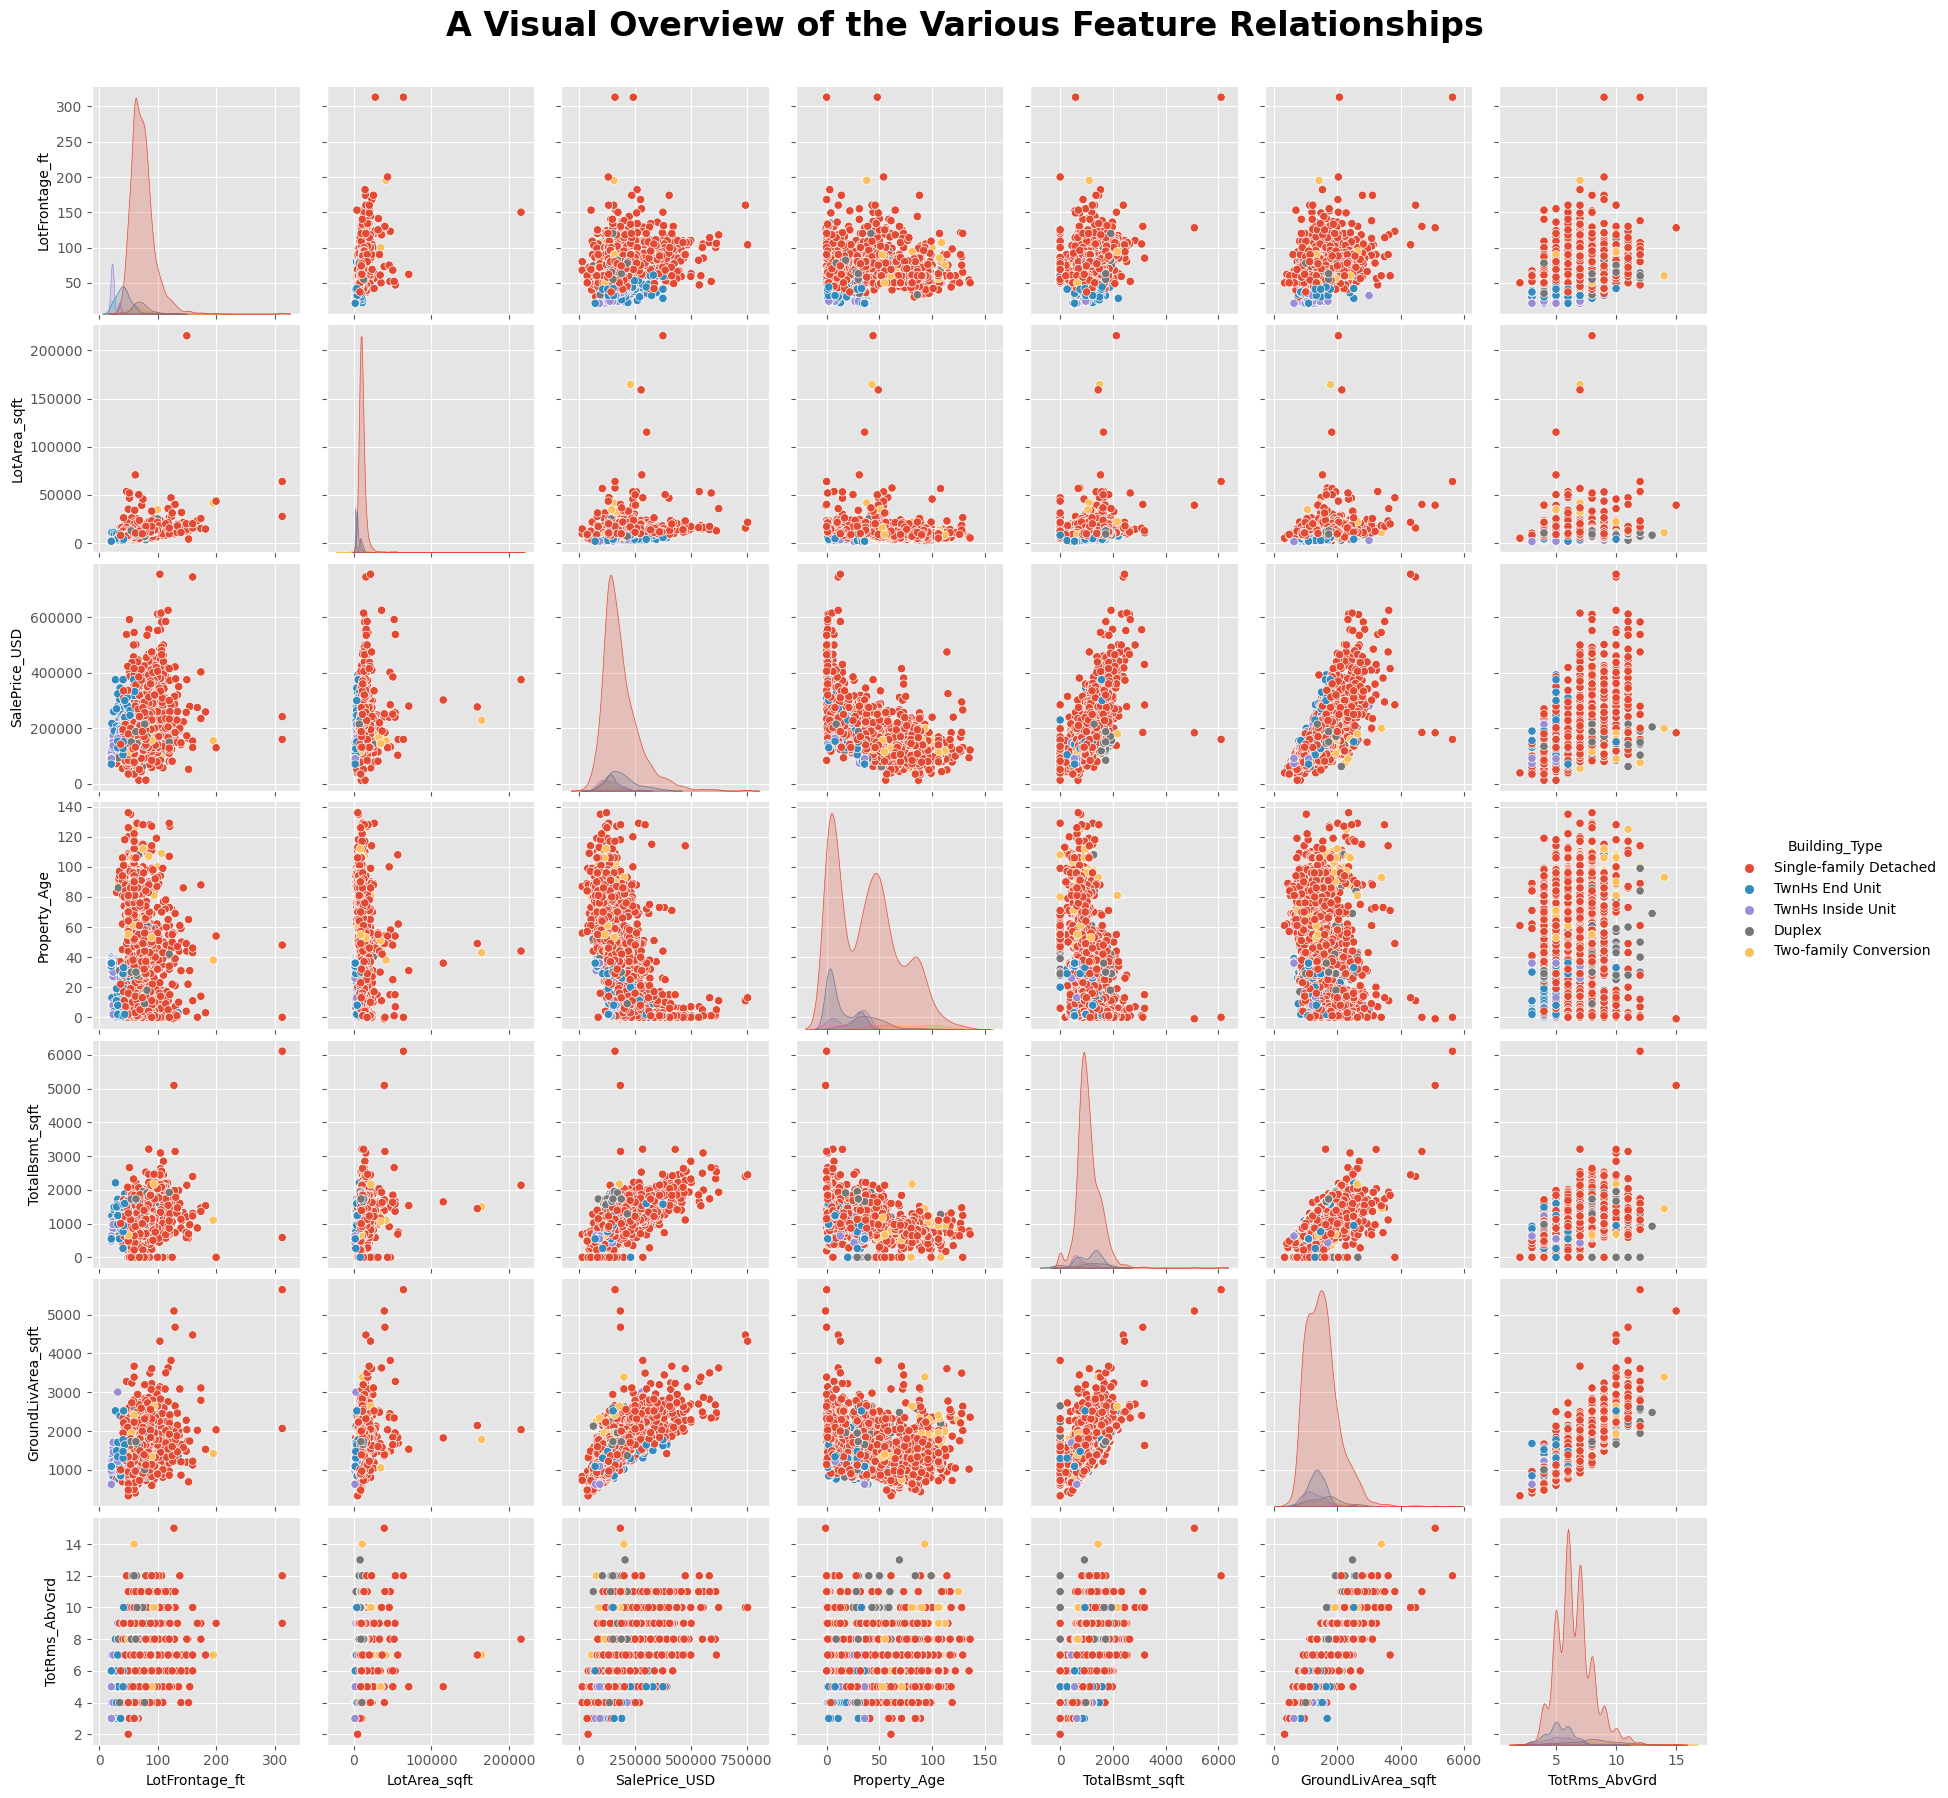

In [70]:
#creating a pairplot
g = sns.pairplot(df, 
             vars=['LotFrontage_ft', 'LotArea_sqft', 'SalePrice_USD', 'Property_Age',
                      'TotalBsmt_sqft', 'GroundLivArea_sqft', 'TotRms_AbvGrd'],
            hue='Building_Type')

# Adding overall title
g.fig.suptitle('A Visual Overview of the Various Feature Relationships', fontsize=24, fontweight='bold', y=1.03 )

#showing the pairplot
plt.show()

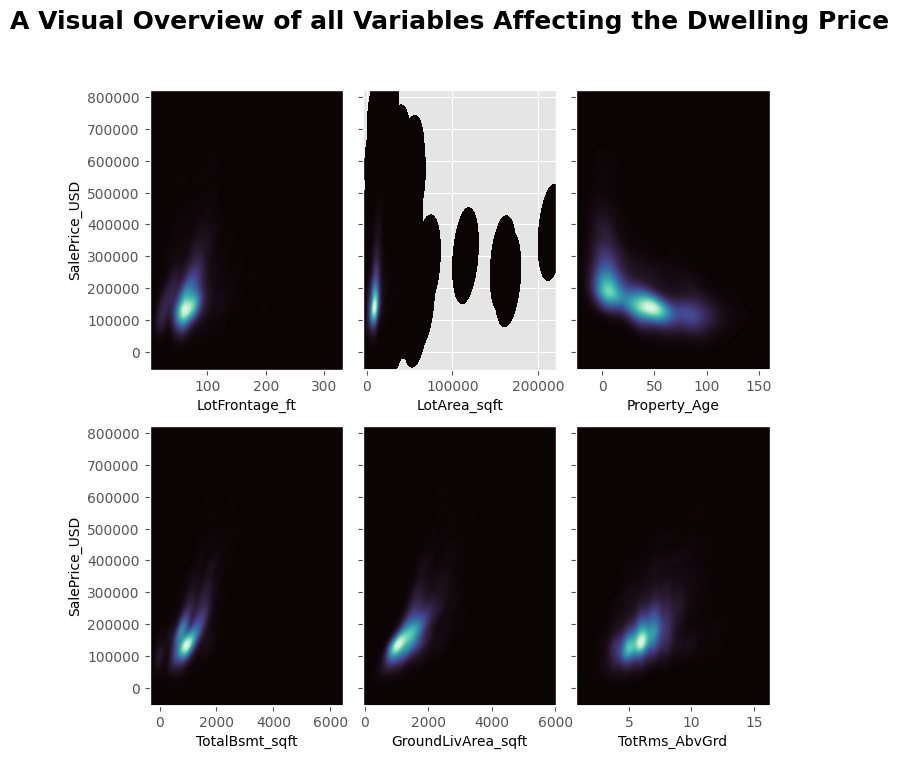

In [87]:
#creating a pairplot
# Creating a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, 
                        figsize=(8, 8), sharey=True,
            gridspec_kw={'hspace': 0.2, 'wspace': 0.1})

ax1 = sns.kdeplot(
        data=df, x="LotFrontage_ft", y="SalePrice_USD",
        fill=True, thresh=0, levels=100, cmap="mako", ax=axs[0, 0])
ax2 = sns.kdeplot(
        data=df, x="LotArea_sqft", y="SalePrice_USD",
        fill=True, thresh=0, levels=100, cmap="mako", ax=axs[0, 1])
ax3 = sns.kdeplot(
        data=df, x="Property_Age", y="SalePrice_USD",
        fill=True, thresh=0, levels=100, cmap="mako", ax=axs[0, 2])
ax4 = sns.kdeplot(
        data=df, x="TotalBsmt_sqft", y="SalePrice_USD",
        fill=True, thresh=0, levels=100, cmap="mako", ax=axs[1, 0])
ax5 = sns.kdeplot(
        data=df, x="GroundLivArea_sqft", y="SalePrice_USD",
        fill=True, thresh=0, levels=100, cmap="mako", ax=axs[1, 1])
ax6 = sns.kdeplot(
        data=df, x="TotRms_AbvGrd", y="SalePrice_USD",
        fill=True, thresh=0, levels=100, cmap="mako", ax=axs[1, 2])
                

# Adding overall title
fig.suptitle('A Visual Overview of all Variables Affecting the Dwelling Price', fontsize=18, fontweight='bold' )

#showing the pairplot
plt.show()

In [88]:
numerical_data = df.select_dtypes("number")
numerical_data.columns

Index(['LotFrontage_ft', 'LotArea_sqft', 'Year_Built', 'TotalBsmt_sqft',
       'GroundLivArea_sqft', 'Bedroom_AbvGr', 'Full_Bath', 'TotRms_AbvGrd',
       'Year_Sold', 'SalePrice_USD', 'Property_Age'],
      dtype='object')

**Correlation**

In [92]:
df_corr = df[['LotFrontage_ft', 'LotArea_sqft', 'Year_Built', 'TotalBsmt_sqft',
       'GroundLivArea_sqft', 'Bedroom_AbvGr', 'Full_Bath', 'TotRms_AbvGrd',
       'Year_Sold', 'SalePrice_USD', 'Property_Age']].dropna().corr()
df_corr

,LotFrontage_ft,LotArea_sqft,Year_Built,TotalBsmt_sqft,GroundLivArea_sqft,Bedroom_AbvGr,Full_Bath,TotRms_AbvGrd,Year_Sold,SalePrice_USD,Property_Age
LotFrontage_ft,1.000000,0.491849,0.122147,0.354031,0.384629,0.241380,0.185950,0.354322,-0.007405,0.358163,-0.122296
LotArea_sqft,0.491849,1.000000,0.061409,0.294912,0.342541,0.161172,0.149263,0.274950,-0.021224,0.321026,-0.062217
Year_Built,0.122147,0.061409,1.000000,0.435021,0.242788,-0.063066,0.476621,0.116985,-0.010509,0.566885,-0.999122
TotalBsmt_sqft,0.354031,0.294912,0.435021,1.000000,0.469770,0.052087,0.346055,0.302828,-0.004913,0.647416,-0.434653
GroundLivArea_sqft,0.384629,0.342541,0.242788,0.469770,1.000000,0.507310,0.624058,0.811158,-0.029510,0.706090,-0.243704
Bedroom_AbvGr,0.241380,0.161172,-0.063066,0.052087,0.507310,1.000000,0.337054,0.662439,-0.025468,0.135524,0.061917
Full_Bath,0.185950,0.149263,0.476621,0.346055,0.624058,0.337054,1.000000,0.528777,-0.002086,0.553094,-0.476080
TotRms_AbvGrd,0.354322,0.274950,0.116985,0.302828,0.811158,0.662439,0.528777,1.000000,-0.029578,0.501361,-0.118069
Year_Sold,-0.007405,-0.021224,-0.010509,-0.004913,-0.029510,-0.025468,-0.002086,-0.029578,1.000000,-0.027203,0.052381
SalePrice_USD,0.358163,0.321026,0.566885,0.647416,0.706090,0.135524,0.553094,0.501361,-0.027203,1.000000,-0.567277


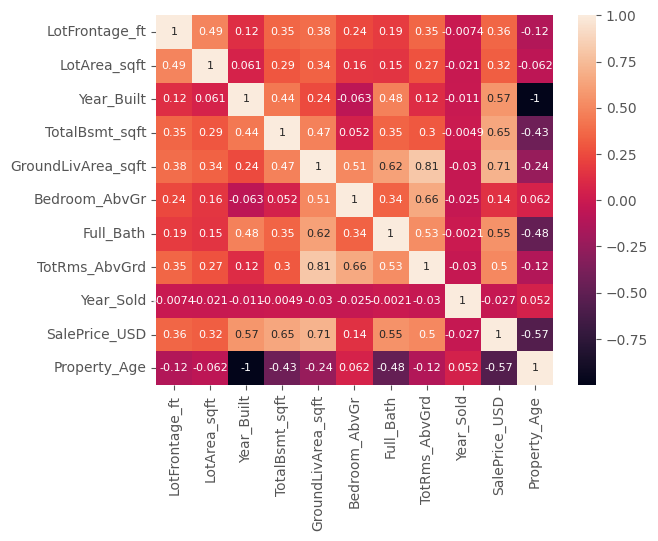

In [97]:
sns.heatmap(df_corr,  annot=True, annot_kws={"fontsize":8})
plt.show()

## **Regression**